In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

Loading Datasets

In [20]:
df=pd.read_csv("winequalityN.csv")

In [4]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
df.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

Dataset Description

In [7]:
df.shape

(6497, 13)

In [82]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'best quality'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Check for Null values

In [22]:
df.isnull().sum().to_frame()

0
type                   0
fixed acidity         10
volatile acidity       8
citric acid            3
residual sugar         2
chlorides              2
free sulfur dioxide    0
total sulfur dioxide   0
density                0
pH                     9
sulphates              4
alcohol                0
quality                0

In [31]:
df['fixed acidity']=df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity']=df['volatile acidity'].ffill()
df['citric acid']=df['citric acid'].fillna(df['citric acid'].median())
df['residual sugar']=df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides']=df['chlorides'].ffill()
df['pH']=df['pH'].fillna(df['pH'].mean())
df['sulphates']=df['sulphates'].ffill()

In [32]:
df.select_dtypes(include='object').head()

type
0  white
1  white
2  white
3  white
4  white

In [33]:
df.select_dtypes(include=['int','float']).head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

The datset happen to have null values we tend to remove them

In [34]:
df.isnull().sum().to_frame()

0
type                  0
fixed acidity         0
volatile acidity      0
citric acid           0
residual sugar        0
chlorides             0
free sulfur dioxide   0
total sulfur dioxide  0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0

Check for duplicated values

In [35]:
print("Duplicate Values",df.duplicated().sum())

Duplicate Values 1169


In [36]:
df.drop_duplicates()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white       7.000000             0.270         0.36       20.700000   
1     white       6.300000             0.300         0.34        1.600000   
2     white       8.100000             0.280         0.40        6.900000   
3     white       7.200000             0.230         0.32        8.500000   
6     white       6.200000             0.320         0.16        7.000000   
9     white       8.100000             0.220         0.43        1.500000   
10    white       8.100000             0.270         0.41        1.450000   
11    white       8.600000             0.230         0.40        4.200000   
12    white       7.900000             0.180         0.37        1.200000   
13    white       6.600000             0.160         0.40        1.500000   
14    white       8.300000             0.420         0.62       19.250000   
15    white       6.600000             0.170         0.38        1.500000   
16    white       6.300000             0.480         0.04        1.100000   
17    white       7.216579             0.660         0.48        1.200000   
18    white       7.400000             0.340         0.42        1.100000   
19    white       6.500000             0.310         0.14        7.500000   
20    white       6.200000             0.660         0.48        1.200000   
21    white       6.400000             0.310         0.38        2.900000   
22    white       6.800000             0.260         0.42        1.700000   
23    white       7.600000             0.670         0.14        1.500000   
24    white       6.600000             0.270         0.41        1.300000   
25    white       7.000000             0.250         0.32        9.000000   
26    white       6.900000             0.240         0.35        1.000000   
27    white       7.000000             0.280         0.39        8.700000   
28    white       7.400000             0.270         0.48        1.100000   
29    white       7.200000             0.320         0.36        2.000000   
30    white       8.500000             0.240         0.39       10.400000   
31    white       8.300000             0.140         0.34        1.100000   
32    white       7.400000             0.250         0.36        2.050000   
33    white       6.200000             0.120         0.34        5.444326   
34    white       5.800000             0.270         0.20       14.950000   
35    white       7.300000             0.280         0.43        1.700000   
36    white       6.500000             0.390         0.23        5.400000   
37    white       7.000000             0.330         0.32        1.200000   
38    white       7.300000             0.240         0.39       17.950000   
40    white       6.700000             0.230         0.39        2.500000   
41    white       6.700000             0.240         0.39        2.900000   
42    white       7.000000             0.310         0.26        7.400000   
43    white       6.600000             0.240         0.27        1.400000   
44    white       6.700000             0.230         0.26        1.400000   
45    white       7.400000             0.180         0.31        1.400000   
46    white       6.200000             0.450         0.26        4.400000   
47    white       6.200000             0.460         0.25        4.400000   
49    white       6.900000             0.190         0.35        5.000000   
50    white       7.200000             0.190         0.31        1.600000   
51    white       6.600000             0.250         0.29        1.100000   
52    white       6.200000             0.160         0.33        1.100000   
53    white       6.400000             0.180         0.35        1.000000   
54    white       6.800000             0.200         0.59        0.900000   
55    white       6.900000             0.250         0.35        1.300000   
56    white       7.200000             0.210         0.34       11.900000   
57 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [40]:
df.nunique()

type                      2
fixed acidity           107
volatile acidity        187
citric acid              89
residual sugar          317
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      109
sulphates               111
alcohol                 111
quality                   7
dtype: int64

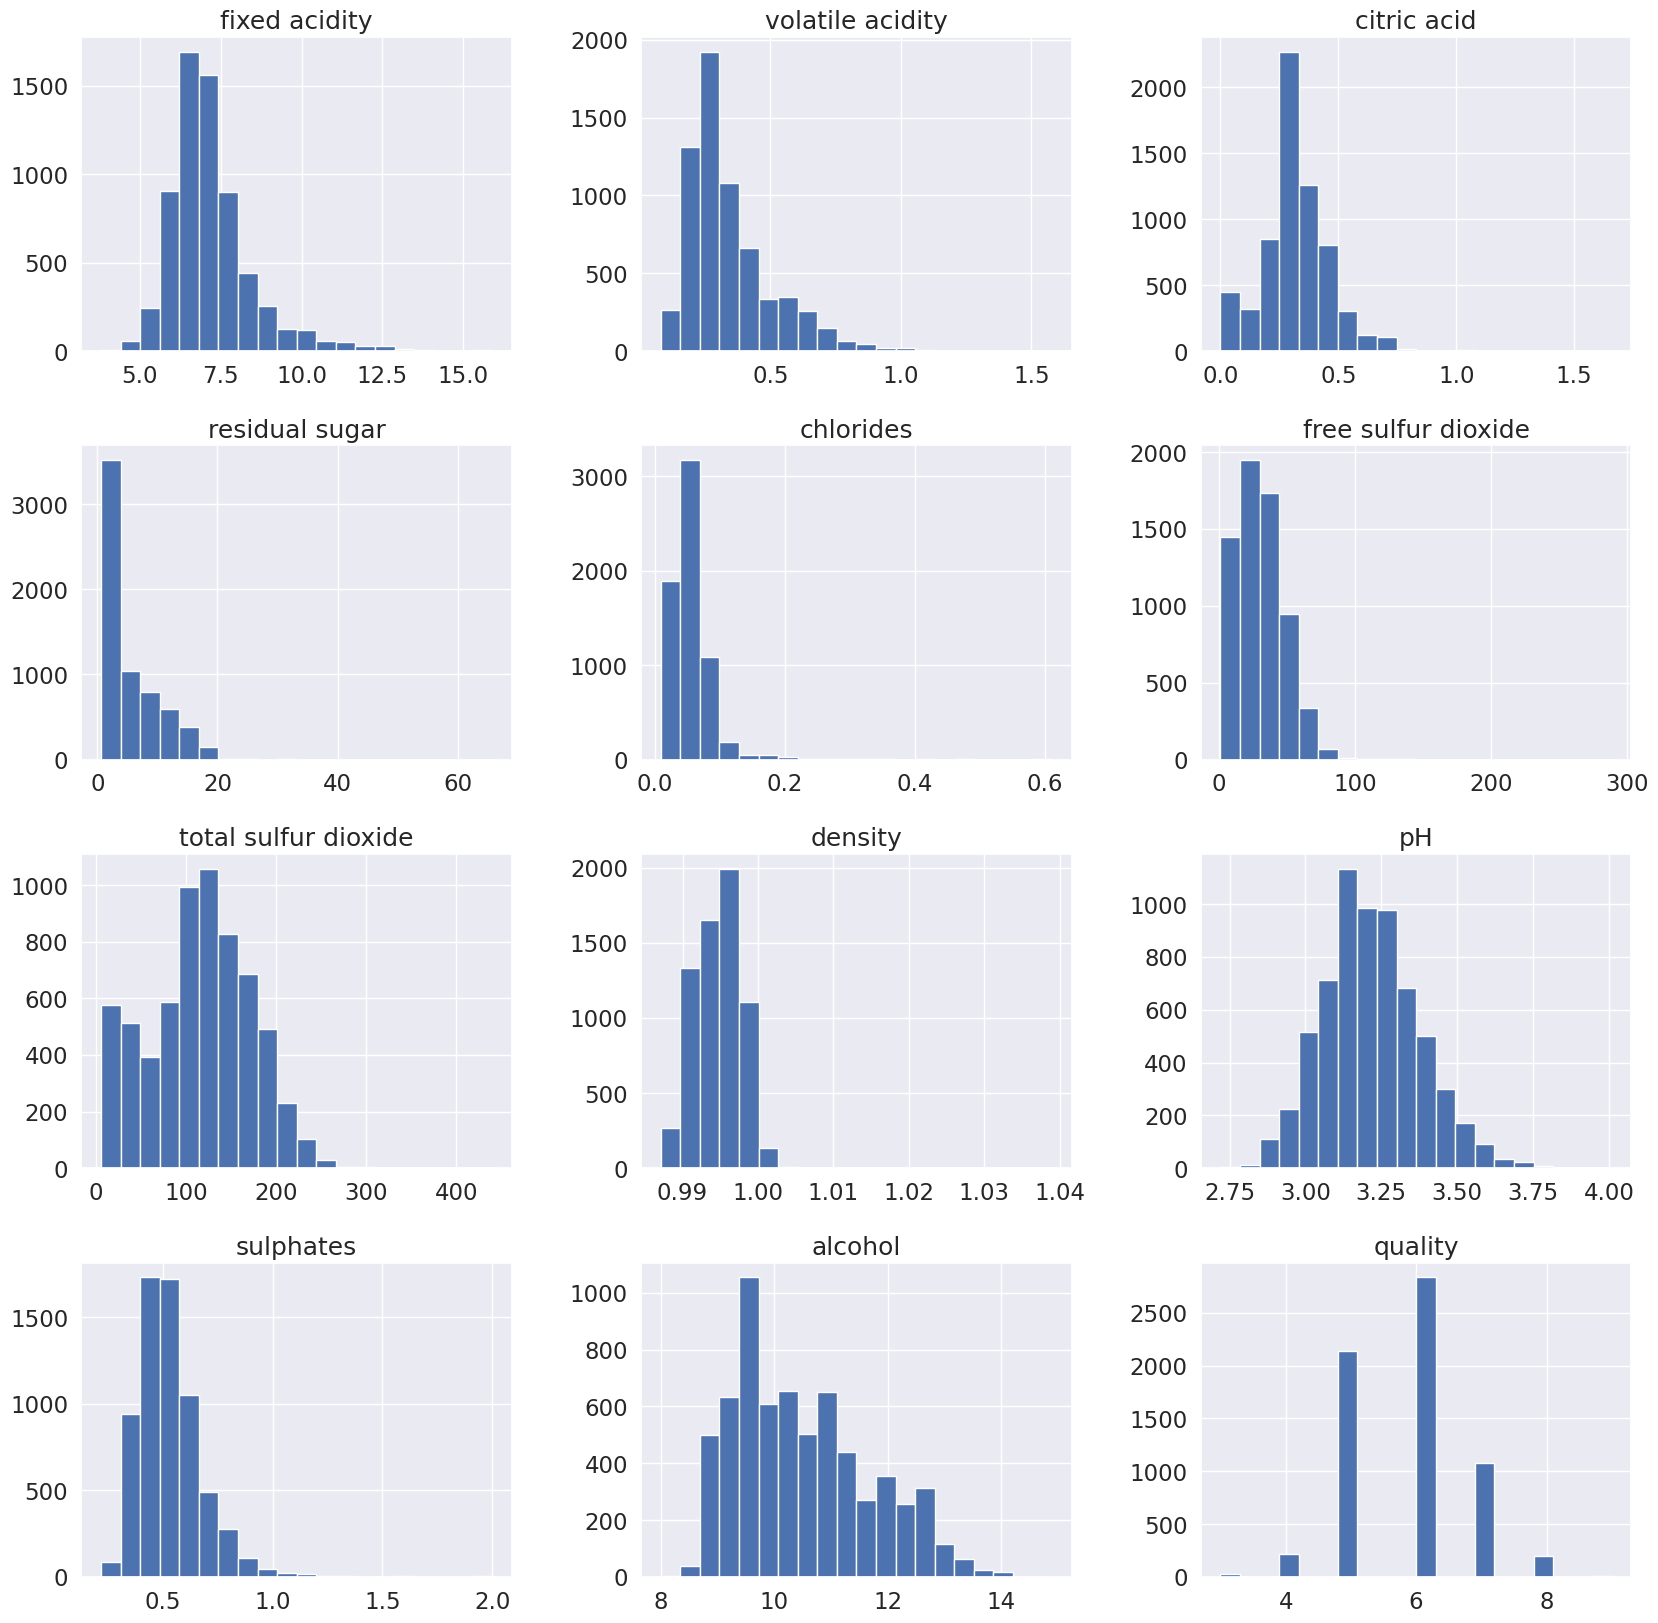

In [42]:
df.hist(bins=20,figsize=(20,20))
plt.show()

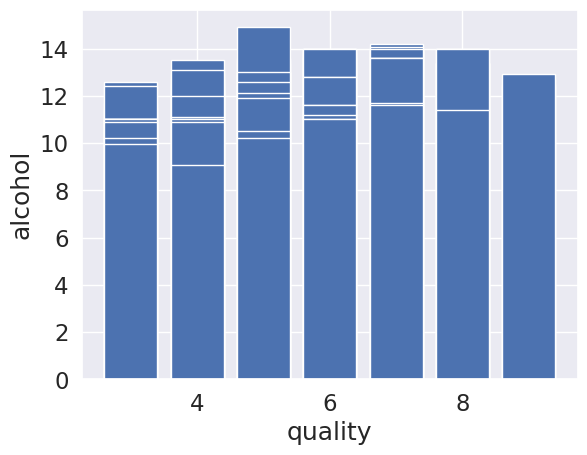

In [44]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [45]:
df['best quality'] = [1 if x>5 else 0 for x in df.quality]


In [46]:
df.replace({'white':1,'red':0},inplace=True)

Train Test Split

In [48]:
features=df.drop(['quality','best quality'],axis=1)
target=df['best quality']
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=40)

In [51]:
print(x_train.shape,"\n",x_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(5197, 12) 
 (1300, 12) 
 (5197,) 
 (1300,)


In [77]:
normalization = MinMaxScaler()
x_train = normalization.fit_transform(x_train)
x_test = normalization.fit_transform(x_test)


In [78]:
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report

LogisticRegression()
Training Accuracy :  0.7025688218063545
Validation Accuracy :  0.6623348760229257
Confusion Matrix:
[[213 261]
 [103 723]]


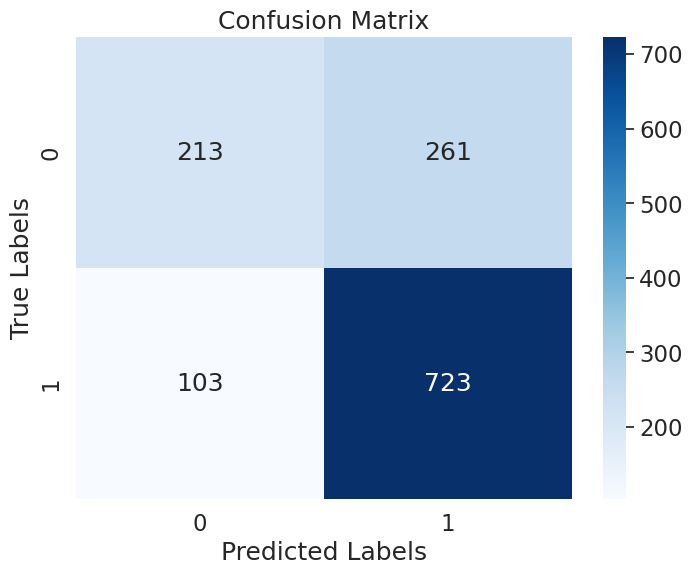

              precision    recall  f1-score   support

           0       0.67      0.45      0.54       474
           1       0.73      0.88      0.80       826

    accuracy                           0.72      1300
   macro avg       0.70      0.66      0.67      1300
weighted avg       0.71      0.72      0.70      1300


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None

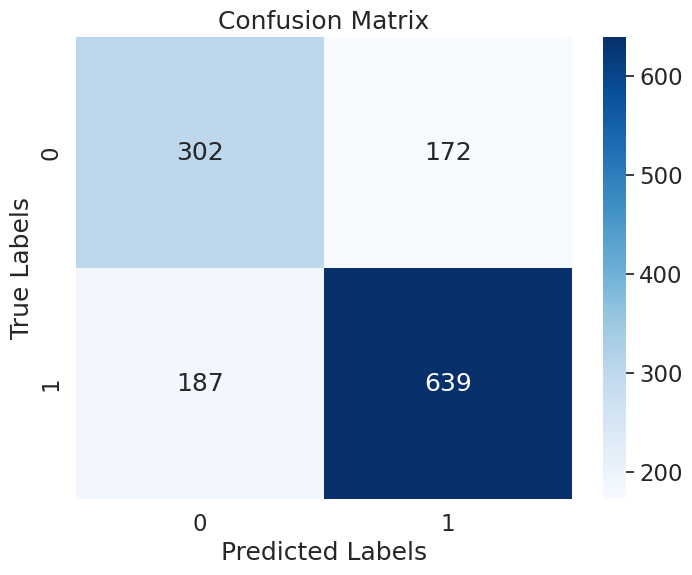

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       474
           1       0.79      0.77      0.78       826

    accuracy                           0.72      1300
   macro avg       0.70      0.71      0.70      1300
weighted avg       0.73      0.72      0.72      1300




In [80]:
models = [LogisticRegression(), XGBClassifier()]

for i in range(2):
    models[i].fit(x_train, y_train)

    print(models[i])
    train_predictions = models[i].predict(x_train)
    train_accuracy = roc_auc_score(y_train, train_predictions)
    print('Training Accuracy : ', train_accuracy)

    test_predictions = models[i].predict(x_test)
    test_accuracy = roc_auc_score(y_test, test_predictions)
    print('Validation Accuracy : ', test_accuracy)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    print('Confusion Matrix:')
    print(cm)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    print(classification_report(y_test,models[i].predict(x_test)))

    print()